# Load packages and data

In [1]:
# Loading the required packages to run this notebook
import src.utils.plotting as plotting
from src.visualisation.VisualiseTrajectories import VisualiseTrajectories
from src.Config import Config, ROISCOGConfig
import matplotlib.pyplot as plt, matplotlib.style as style, matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pathlib import Path
import progressbar
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

# Use seaborn style defaults and set the default figure size
fig_size = (10, 10)
sns.set(rc={"figure.figsize": fig_size})
sns.set_theme(style="whitegrid")
sns.set_context("paper") # One of paper, notebook, talk, and poster
style.use('seaborn-colorblind')

# Setup the correct foldure structure
project_dir = Path().resolve().parents[1]
processed_data_dir = project_dir / "data" / "processed"

# Define the regions to look into
region = "Bornholm" # "Denmark" "Skagen"
zoom = 8

In [2]:
fig_size = (10, 10)
visualise_trajectories = VisualiseTrajectories(region, save_figures=True, plot_figures=True, fig_size=fig_size, zoom=zoom)
lon_min, lon_max, lat_min, lat_max = visualise_trajectories.bounds

# Load the static Google Map image for the RIO
img = visualise_trajectories.read_static_map()

In [3]:
file_name = "RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600"
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")

# Read the info file to know how to read the data file
with open(data_info_file, "rb") as f:
    data_info = pickle.load(f)
data_info["indicies"][:10]

[0, 4856, 10342, 15450, 19865, 22201, 25167, 27125, 31414, 35451]

In [4]:
# Get the requested track - Read the data file from the current index
def get_track_by_index(path, idx, keep_cols=None, col_names=None):
    with open(path, "rb") as f:
        f.seek(idx)
        track = pickle.load(f)
    df = pd.DataFrame(track)
    
    if keep_cols is not None:
        df = df[keep_cols]
    if col_names is not None:
        df.columns = col_names
    return df

index = 0
df_lon_lat = get_track_by_index(data_file, index, keep_cols=["lon", "lat"], col_names=["Longitude", "Latitude"])
print(np.shape(df_lon_lat))
df_lon_lat = visualise_trajectories.remove_points_outside_ROI(df_lon_lat)
print(np.shape(df_lon_lat))

(74, 2)
(74, 2)


# Visualise single trajectories geographically 

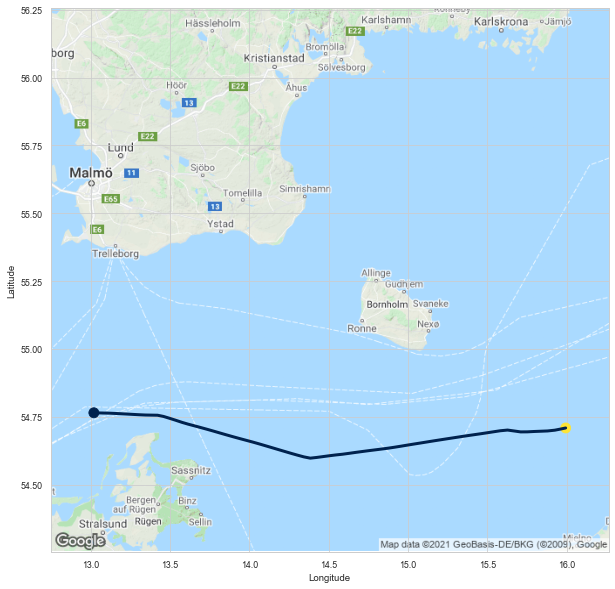

In [5]:
# Plot a single complete vessel trajectory on the static map
visualise_trajectories.read_map_plot_single_track(df_lon_lat)

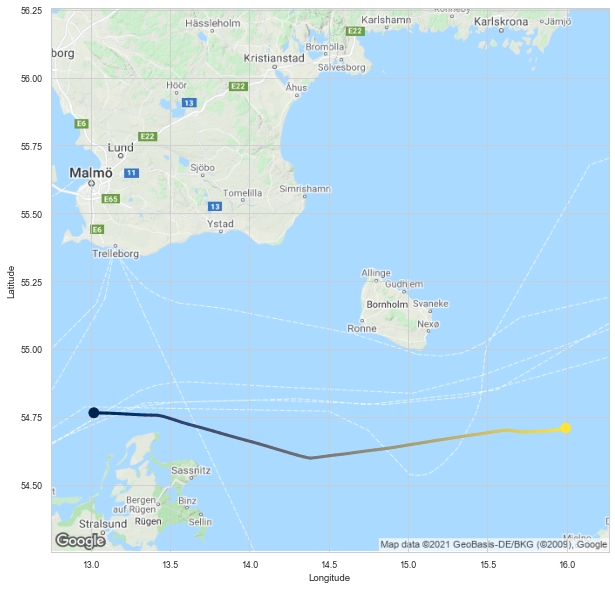

In [6]:
# Plot a single complete vessel trajectory on the static map
visualise_trajectories.read_map_plot_single_track(df_lon_lat, use_cmap=True)

# Visualise multiple trajectories geographically 

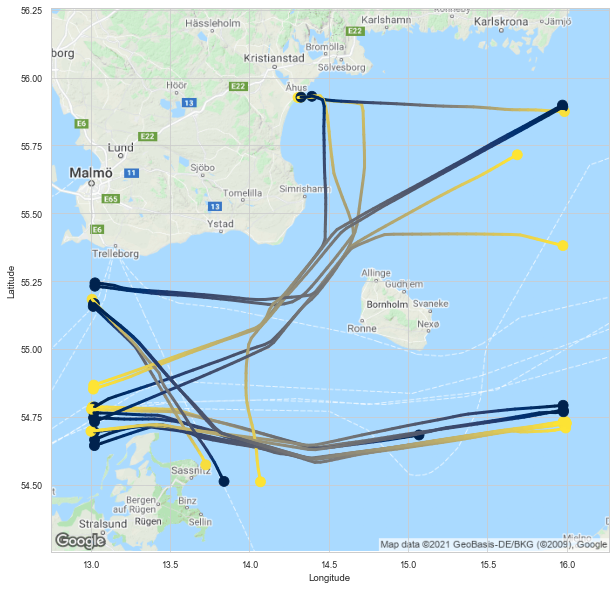

In [7]:
# Stop plotting and saving after each trajectory
visualise_trajectories.save_figures = False
visualise_trajectories.plot_figures = False
fig, ax = visualise_trajectories.visualise_static_map(img)

# Plot some trajectory examples
trajectories = []
for idx in data_info["indicies"][:20]:
    df = get_track_by_index(data_file, idx)
    trajectories.append([df["mmsi"][0], df["track_length"][0], df["timestamp"][0], df["timestamp"].iloc[-1]])
    df_lon_lat =  get_track_by_index(data_file, idx, keep_cols=["lon", "lat"], col_names=["Longitude", "Latitude"])    
    visualise_trajectories.plot_single_track(df_lon_lat, ax, use_cmap=True)

# Plot the last trajectory and save the results
visualise_trajectories.save_figures = True
visualise_trajectories.plot_figures = True
df = get_track_by_index(data_file, data_info["indicies"][20])
trajectories.append([df["mmsi"][0], df["track_length"][0], df["timestamp"][0], df["timestamp"].iloc[-1]])
df_lon_lat =  get_track_by_index(data_file, data_info["indicies"][20], keep_cols=["lon", "lat"],
                                 col_names=["Longitude", "Latitude"])    
visualise_trajectories.plot_single_track(df_lon_lat, ax, use_cmap=True)

In [8]:
df = pd.DataFrame(trajectories, columns=["MMSI", "TrackLength" , "DateTimeStart", "DateTimeEnd"])
df = df.sort_values("DateTimeStart")
df["NextDateTimeStart"] = df["DateTimeStart"].shift(-1)
df

,MMSI,TrackLength,DateTimeStart,DateTimeEnd,NextDateTimeStart
17,205723000,56,2019-06-03 18:36:37,2019-06-04 03:46:37,2019-06-04 13:29:17
0,205387000,74,2019-06-04 13:29:17,2019-06-05 01:39:17,2019-06-11 21:09:23
18,205723000,67,2019-06-11 21:09:23,2019-06-12 08:09:23,2019-06-11 22:23:51
19,205767000,62,2019-06-11 22:23:51,2019-06-12 08:33:51,2019-06-14 00:19:12
20,205767000,52,2019-06-14 00:19:12,2019-06-14 08:49:12,2019-06-14 08:10:33
12,205689000,62,2019-06-14 08:10:33,2019-06-14 18:20:33,2019-06-23 12:00:16
13,205689000,63,2019-06-23 12:00:16,2019-06-23 22:20:16,2019-06-24 06:44:39
1,205439000,84,2019-06-24 06:44:39,2019-06-24 20:34:39,2019-06-27 14:27:15
2,205439000,78,2019-06-27 14:27:15,2019-06-28 03:17:15,2019-07-03 19:01:05
14,205689000,66,2019-07-03 19:01:05,2019-07-04 05:51:05,2019-07-12 13:25:01


# Visualise multiple trajectories geographically - Comparison

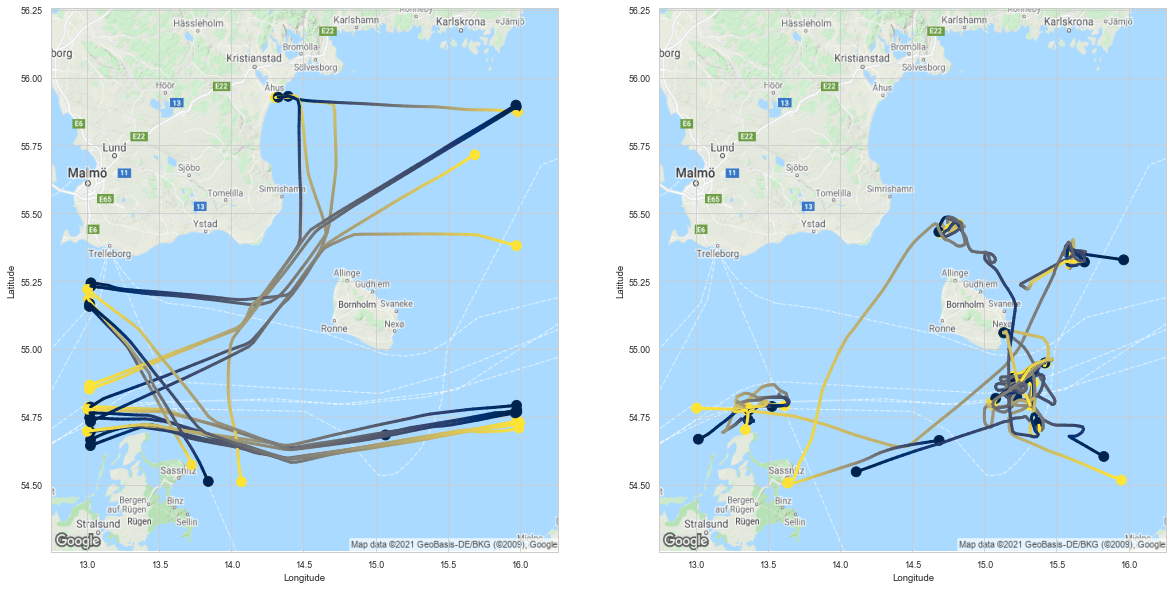

In [14]:
# Stop plotting and saving after each trajectory
visualise_trajectories.fig_size = (20,10)
fig, ax = visualise_trajectories.visualise_static_map(img, subplots=[1, 2])
visualise_trajectories.save_figures = False
visualise_trajectories.plot_figures = False

# Plot some cargo and tanker vessel trajectory examples
file_name = "RegionBornholm_01062019_30092019_CargTank_14400_86400_600"
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")

# Read the info file to know how to read the data file
with open(data_info_file, "rb") as f:
    data_info = pickle.load(f)

for idx in data_info["indicies"][:21]:
    df = get_track_by_index(data_file, idx)
    df_lon_lat =  get_track_by_index(data_file, idx, keep_cols=["lon", "lat"], col_names=["Longitude", "Latitude"])    
    visualise_trajectories.plot_single_track(df_lon_lat, ax[0], use_cmap=True)

# Plot some fishing vessel trajectory examples
file_name = "RegionBornholm_01062019_30092019_Fish_14400_86400_600"
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")

# Read the info file to know how to read the data file
with open(data_info_file, "rb") as f:
    data_info = pickle.load(f)

for idx in data_info["indicies"][:20]:
    df = get_track_by_index(data_file, idx)
    df_lon_lat =  get_track_by_index(data_file, idx, keep_cols=["lon", "lat"], col_names=["Longitude", "Latitude"])    
    visualise_trajectories.plot_single_track(df_lon_lat, ax[1], use_cmap=True)

# Plot the last trajectory and save the results
visualise_trajectories.save_figures = True
visualise_trajectories.plot_figures = True
df = get_track_by_index(data_file, data_info["indicies"][20])
df_lon_lat =  get_track_by_index(data_file, data_info["indicies"][20], keep_cols=["lon", "lat"],
                                 col_names=["Longitude", "Latitude"])    
visualise_trajectories.plot_single_track(df_lon_lat, ax[1], use_cmap=True)

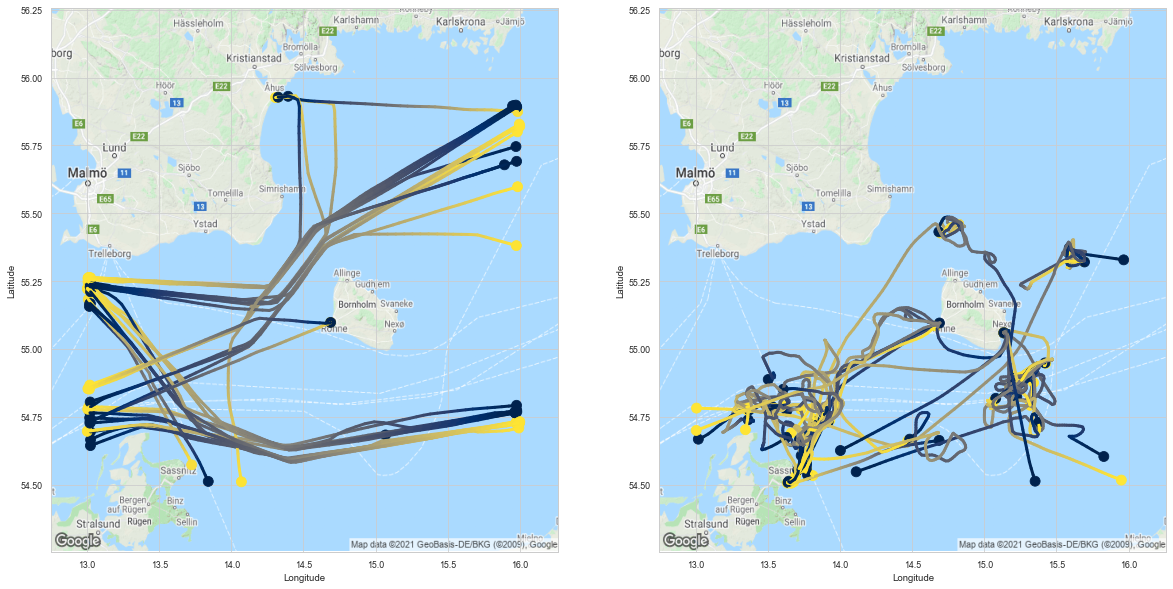

In [15]:
# Stop plotting and saving after each trajectory
visualise_trajectories.fig_size = (20,10)
fig, ax = visualise_trajectories.visualise_static_map(img, subplots=[1, 2])
visualise_trajectories.save_figures = False
visualise_trajectories.plot_figures = False

# Plot some cargo and tanker vessel trajectory examples
file_name = "RegionBornholm_01062019_30092019_CargTank_14400_86400_600"
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")

# Read the info file to know how to read the data file
with open(data_info_file, "rb") as f:
    data_info = pickle.load(f)

for idx in data_info["indicies"][:41]:
    df = get_track_by_index(data_file, idx)
    df_lon_lat =  get_track_by_index(data_file, idx, keep_cols=["lon", "lat"], col_names=["Longitude", "Latitude"])    
    visualise_trajectories.plot_single_track(df_lon_lat, ax[0], use_cmap=True)

# Plot some fishing vessel trajectory examples
file_name = "RegionBornholm_01062019_30092019_Fish_14400_86400_600"
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")

# Read the info file to know how to read the data file
with open(data_info_file, "rb") as f:
    data_info = pickle.load(f)

for idx in data_info["indicies"][:40]:
    df = get_track_by_index(data_file, idx)
    df_lon_lat =  get_track_by_index(data_file, idx, keep_cols=["lon", "lat"], col_names=["Longitude", "Latitude"])    
    visualise_trajectories.plot_single_track(df_lon_lat, ax[1], use_cmap=True)

# Plot the last trajectory and save the results
visualise_trajectories.save_figures = True
visualise_trajectories.plot_figures = True
df = get_track_by_index(data_file, data_info["indicies"][41])
df_lon_lat =  get_track_by_index(data_file, data_info["indicies"][41], keep_cols=["lon", "lat"],
                                 col_names=["Longitude", "Latitude"])    
visualise_trajectories.plot_single_track(df_lon_lat, ax[1], use_cmap=True)